In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,root_mean_squared_error

In [178]:
df = pd.read_csv("uber.csv")
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [179]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [181]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [182]:
df.dropna(inplace=True)

In [183]:
df.shape

(199999, 9)

In [184]:
df.drop(df.columns[:2],axis=1,inplace=True)
#df = df.iloc[:, 2:]
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [185]:
df.drop(df[df['pickup_latitude']<-90].index,inplace=True)
df.drop(df[df['pickup_latitude']>90].index,inplace=True)

df.drop(df[df['dropoff_latitude']<-90].index,inplace=True)
df.drop(df[df['dropoff_latitude']>90].index,inplace=True)

df.drop(df[df['pickup_longitude']<-180].index,inplace=True)
df.drop(df[df['pickup_longitude']>180].index,inplace=True)

df.drop(df[df['dropoff_longitude']<-180].index,inplace=True)
df.drop(df[df['dropoff_longitude']>180].index,inplace=True)

#Fare Amount
df.drop(df[df['fare_amount']<=0].index, inplace=True)

#Passenger
#Fare Amount
df.drop(df[df['passenger_count']>4].index, inplace=True)
df.drop(df[df['passenger_count']==0].index, inplace=True)

In [186]:
def distance(lat1,long1,lat2,long2):
    return geodesic((lat1,long1),(lat2,long2)).km

df['distance'] = df.apply(lambda x:distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']),axis=1)
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.681111
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.454363
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.039603
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661442
5,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1,0.000000
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112128
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.879635
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.867916
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.536552


<Axes: xlabel='distance'>

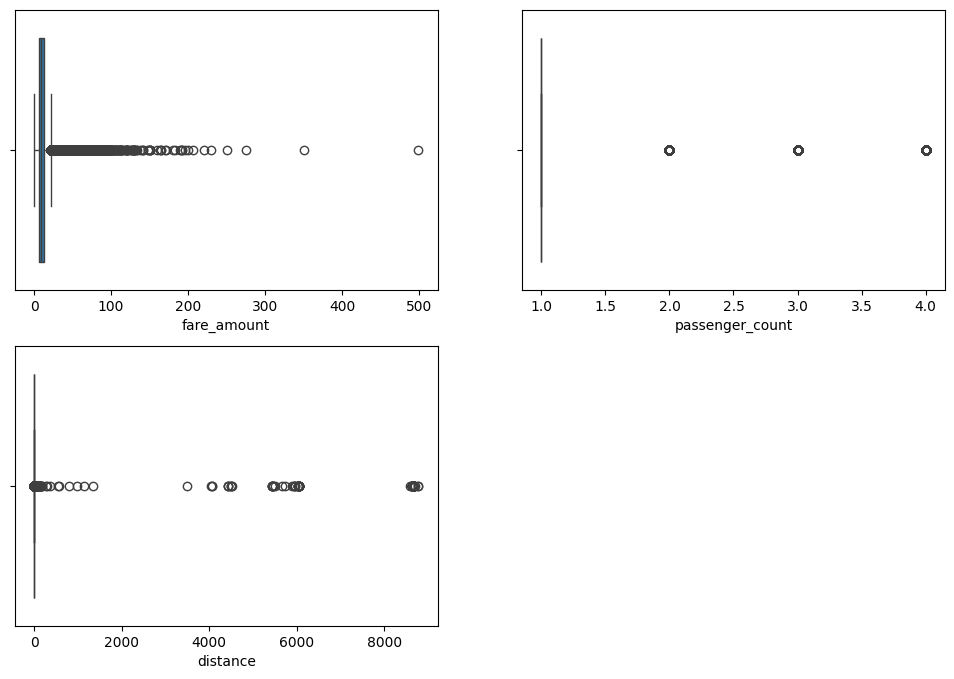

In [187]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.boxplot(data=df,x='fare_amount')

plt.subplot(2,2,2)
sns.boxplot(data=df,x='passenger_count')

plt.subplot(2,2,3)
sns.boxplot(data=df,x='distance')

<Axes: xlabel='distance'>

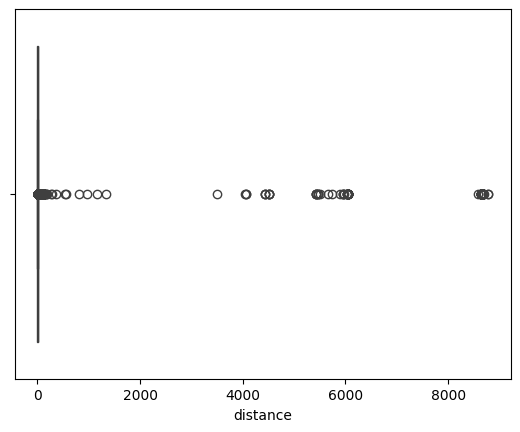

In [188]:
# df.drop(df[df['distance']<4000].index,inplace=True)
sns.boxplot(data=df,x='distance')

In [197]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['weekday'] = df['pickup_datetime'].dt.weekday
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year

In [217]:
X = df[['passenger_count','distance','hour','weekday','month','year']]
y=df['fare_amount']

scaler1 = StandardScaler()
X_Scaled = scaler1.fit_transform(X)
X = pd.DataFrame(X_Scaled,columns = X.columns)
X

,passenger_count,distance,hour,weekday,month,year
0,-0.488067,-0.049566,0.845509,-0.024066,-0.371944,1.752743
1,-0.488067,-0.047533,0.998922,0.489668,0.209745,-1.473597
2,-0.488067,-0.040733,1.152335,-1.565268,0.500589,-1.473597
3,2.456099,-0.049618,-0.842034,0.489668,-0.081099,-1.473597
4,-0.488067,-0.053988,-1.762513,1.003402,-1.244477,-0.398150
...,...,...,...,...,...,...
180976,-0.488067,-0.053693,-0.535208,1.517137,1.082278,0.139573
180977,-0.488067,-0.049044,-1.915926,0.489668,-0.953632,1.215020
180978,0.984016,-0.020144,-2.069339,-1.565268,-0.081099,-1.473597
180979,-0.488067,-0.044686,0.078444,-0.537800,-0.371944,1.752743


In [202]:
ht = X.corr()

<Axes: >

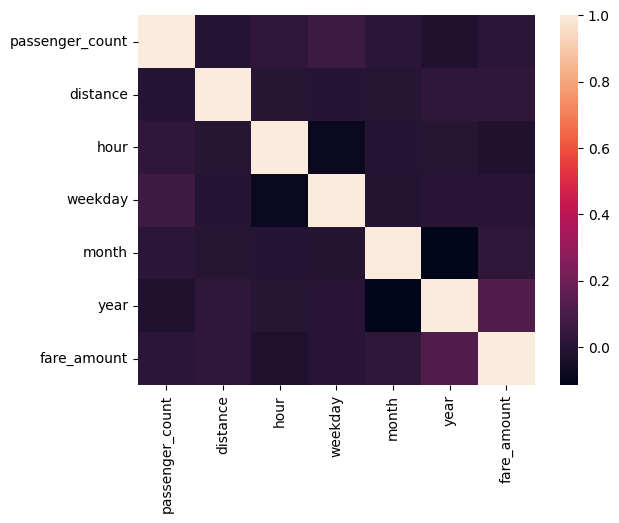

In [203]:
sns.heatmap(ht)

In [223]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

array([ 6.702 ,  7.497 ,  9.9933, ...,  8.74  ,  4.964 , 16.315 ])

In [226]:
print('R2 score:', r2_score(y_test, y_pred))
print('RMSE:', root_mean_squared_error(y_test, y_pred))

R2 score: 0.7148066833179012
RMSE: 5.352716112118822


In [231]:
model2 = LinearRegression()
model2.fit(X_train,y_train)
y_pred1 = model2.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred1))
print('RMSE:', root_mean_squared_error(y_test, y_pred1))

R2 score: 0.018967524927270385
RMSE: 9.927644812130378
